In [1]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import tensorflow as tf
import keras
tf.__version__

from tensorflow.keras.utils import to_categorical

import cv2

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Part A

##Loading the data

In [3]:
df1=pd.read_csv('/content/MyDrive/MyDrive/Dataset/NN Project Data - Signal.csv')  #Reading the csv file

In [4]:
df1.head()  #Showing the first 5 datapoints

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [5]:
df1.shape #checking the no of rows and columns in dataset

(1599, 12)

There are 1599 rows and 12 columns

##Data preprocessing

###Check for missing value

In [6]:
df1.isnull().sum() #check for null values

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [7]:
percent_missing = df1.isnull().sum() * 100 / len(df1)          #missing value percentage
missing_value_df = pd.DataFrame({'column_name': df1.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
Parameter 1          Parameter 1              0.0
Parameter 2          Parameter 2              0.0
Parameter 3          Parameter 3              0.0
Parameter 4          Parameter 4              0.0
Parameter 5          Parameter 5              0.0
Parameter 6          Parameter 6              0.0
Parameter 7          Parameter 7              0.0
Parameter 8          Parameter 8              0.0
Parameter 9          Parameter 9              0.0
Parameter 10        Parameter 10              0.0
Parameter 11        Parameter 11              0.0
Signal_Strength  Signal_Strength              0.0

There are no null values in the dataset

In [8]:
df2=df1.copy(deep=True)

In [9]:
df2.info() #info of the complete dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df2.duplicated().sum()

240

As per the given dataset it is possible to contain duplicate values. Hence further imputations are not performed.

##Data Visualization

In [11]:
df2.describe().T #Statistical summary

count       mean        std      min      25%       50%  \
Parameter 1      1599.0   8.319637   1.741096  4.60000   7.1000   7.90000   
Parameter 2      1599.0   0.527821   0.179060  0.12000   0.3900   0.52000   
Parameter 3      1599.0   0.270976   0.194801  0.00000   0.0900   0.26000   
Parameter 4      1599.0   2.538806   1.409928  0.90000   1.9000   2.20000   
Parameter 5      1599.0   0.087467   0.047065  0.01200   0.0700   0.07900   
Parameter 6      1599.0  15.874922  10.460157  1.00000   7.0000  14.00000   
Parameter 7      1599.0  46.467792  32.895324  6.00000  22.0000  38.00000   
Parameter 8      1599.0   0.996747   0.001887  0.99007   0.9956   0.99675   
Parameter 9      1599.0   3.311113   0.154386  2.74000   3.2100   3.31000   
Parameter 10     1599.0   0.658149   0.169507  0.33000   0.5500   0.62000   
Parameter 11     1599.0  10.422983   1.065668  8.40000   9.5000  10.20000   
Signal_Strength  1599.0   5.636023   0.807569  3.00000   5.0000   6.00000   

                       75%        max  
Parameter 1       9.200000   15.90000  
Parameter 2       0.640000    1.58000  
Parameter 3       0.420000    1.00000  
Parameter 4       2.600000   15.50000  
Parameter 5       0.090000    0.61100  
Parameter 6      21.000000   72.00000  
Parameter 7      62.000000  289.00000  
Parameter 8       0.997835    1.00369  
Parameter 9       3.400000    4.01000  
Parameter 10      0.730000    2.00000  
Parameter 11     11.100000   14.90000  
Signal_Strength   6.000000    8.00000

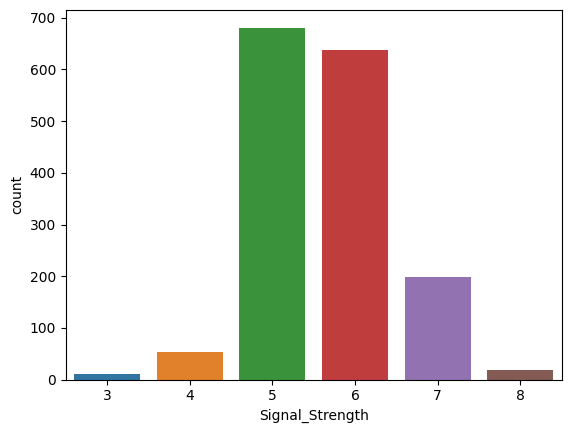

In [12]:
sns.countplot(data=df2,x='Signal_Strength');

Signal 5 and 6 has higher counts

In [13]:
correlation_values=df2.corr()['Signal_Strength']         #Correlation of features with target variable
correlation_values.abs().sort_values(ascending=False)

Signal_Strength    1.000000
Parameter 11       0.476166
Parameter 2        0.390558
Parameter 10       0.251397
Parameter 3        0.226373
Parameter 7        0.185100
Parameter 8        0.174919
Parameter 5        0.128907
Parameter 1        0.124052
Parameter 9        0.057731
Parameter 6        0.050656
Parameter 4        0.013732
Name: Signal_Strength, dtype: float64

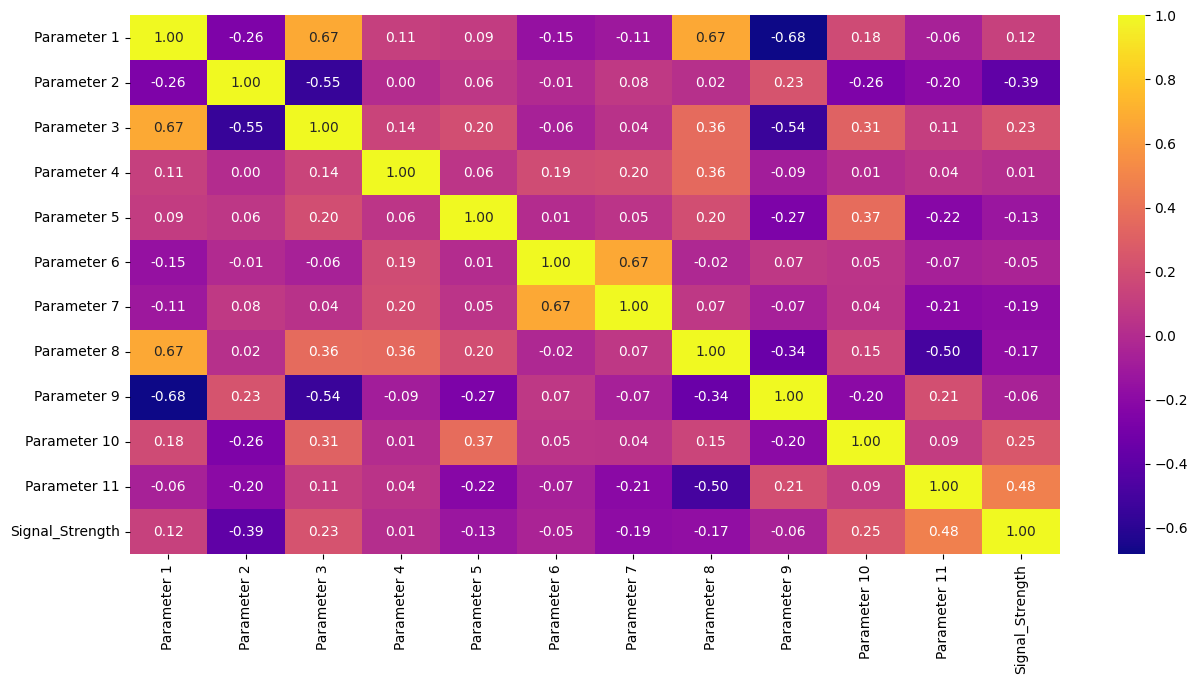

In [14]:
plt.figure(figsize = (15,7))
sns.heatmap(df2.corr(), cmap='plasma',annot=True, fmt='.2f');

Text(0.5, 1.0, 'Signal_Strength')

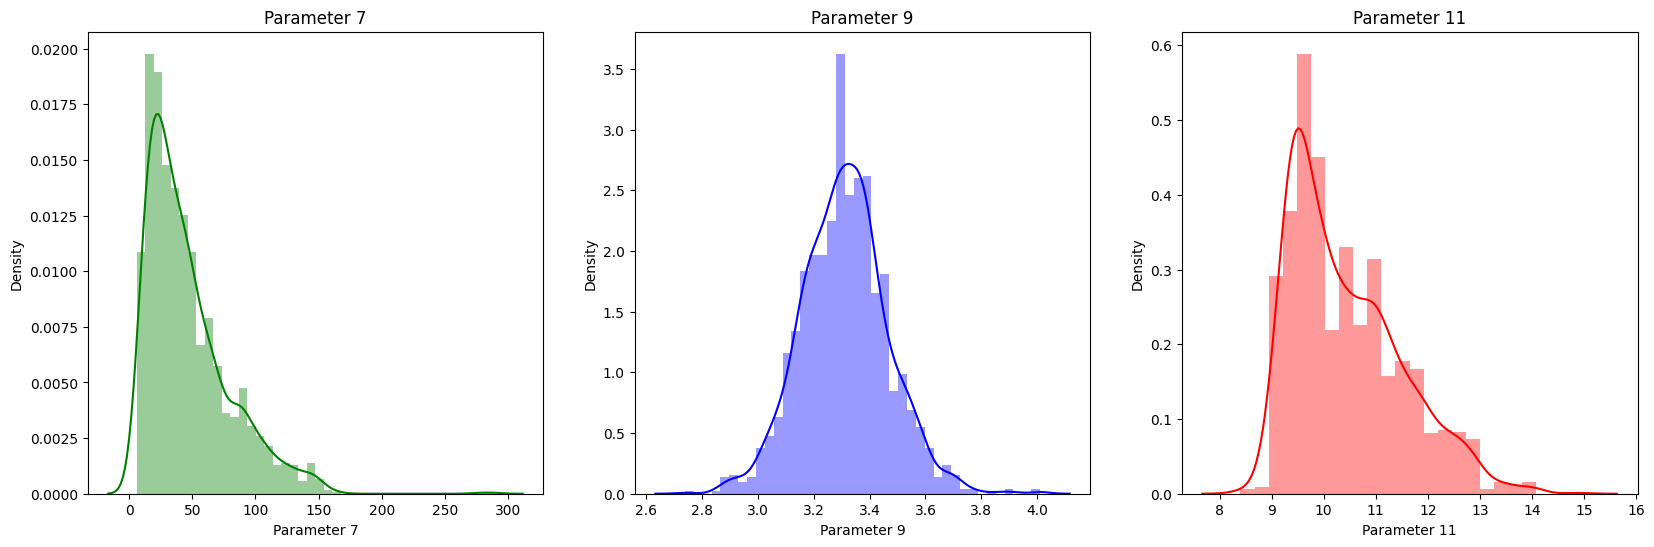

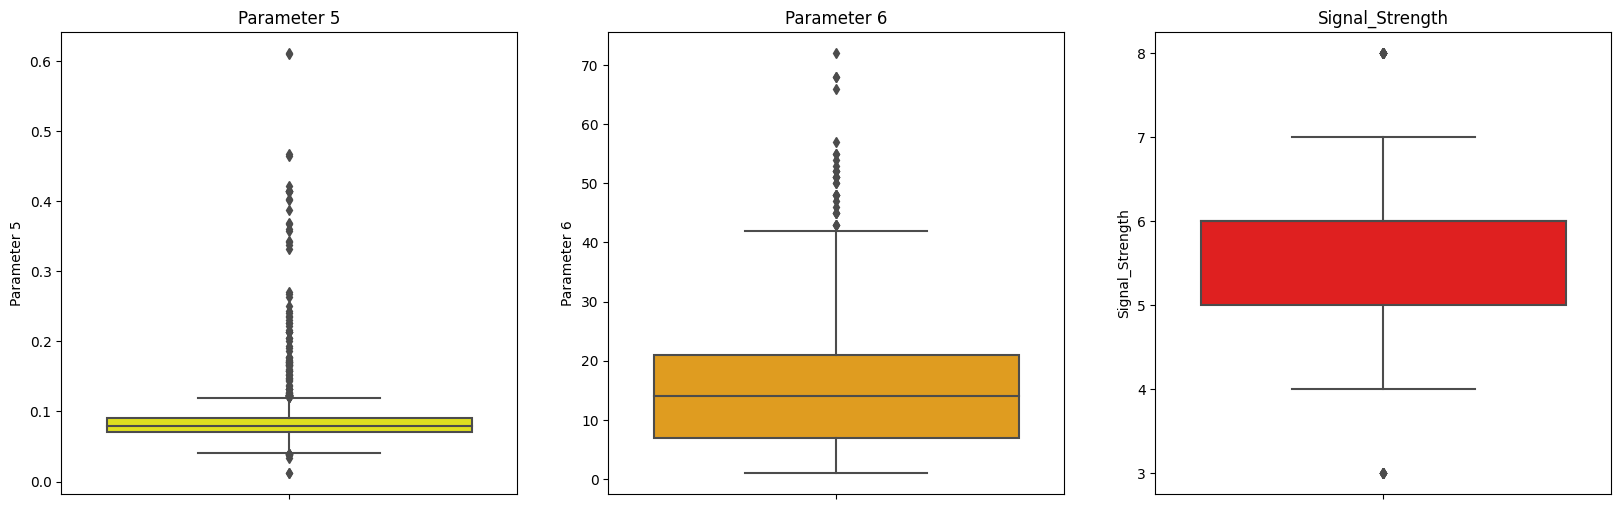

In [15]:
plt.figure(figsize=(20,6));

plt.subplot(1,3,1);
sns.distplot(df2['Parameter 7'],color='green');
plt.title('Parameter 7')

plt.subplot(1,3,2);
sns.distplot(df2['Parameter 9'],color='blue');
plt.title('Parameter 9')

plt.subplot(1,3,3);
sns.distplot(df2['Parameter 11'],color='red');
plt.title('Parameter 11')

plt.figure(figsize=(20,6));

plt.subplot(1,3,1);
sns.boxplot(y=df2['Parameter 5'],color='yellow');
plt.title('Parameter 5')

plt.subplot(1,3,2);
sns.boxplot(y=df2['Parameter 6'],color='orange');
plt.title('Parameter 6')

plt.subplot(1,3,3);
sns.boxplot(y=df2['Signal_Strength'],color='red');
plt.title('Signal_Strength')

Text(0.5, 1.0, 'Parameter 11')

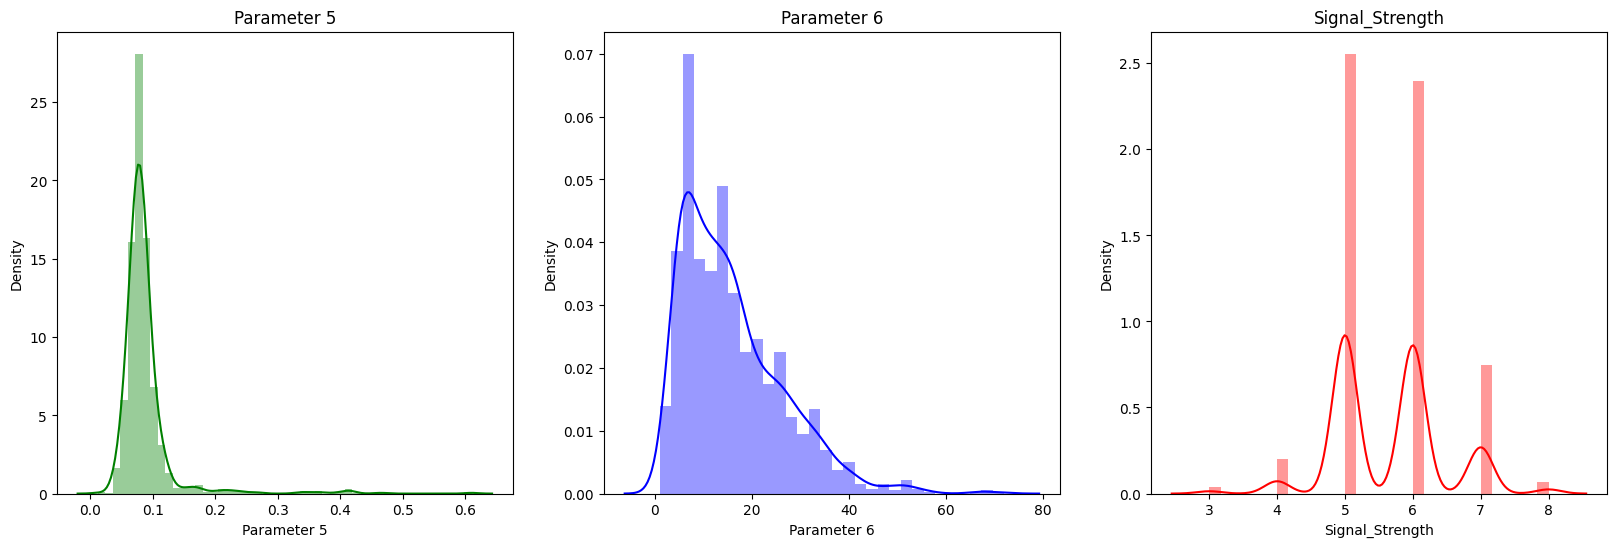

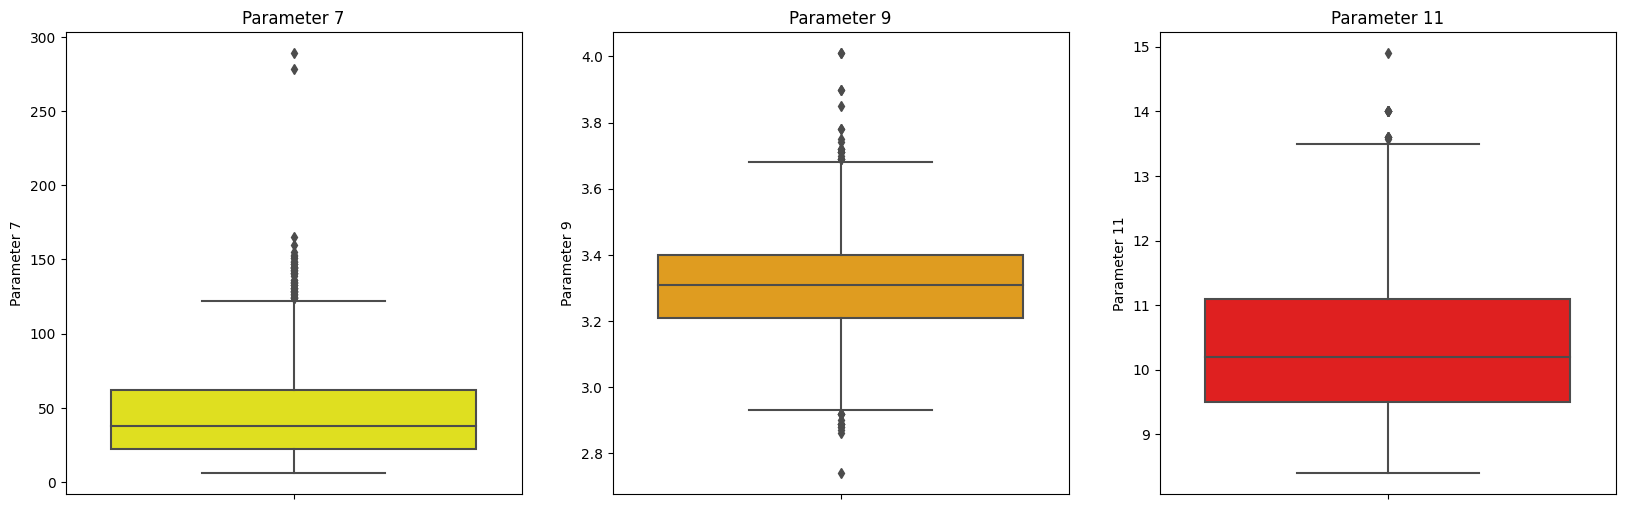

In [16]:
plt.figure(figsize=(20,6));

plt.subplot(1,3,1);
sns.distplot(df2['Parameter 5'],color='green');
plt.title('Parameter 5')

plt.subplot(1,3,2);
sns.distplot(df2['Parameter 6'],color='blue');
plt.title('Parameter 6')

plt.subplot(1,3,3);
sns.distplot(df2['Signal_Strength'],color='red');
plt.title('Signal_Strength')

plt.figure(figsize=(20,6));

plt.subplot(1,3,1);
sns.boxplot(y=df2['Parameter 7'],color='yellow');
plt.title('Parameter 7')

plt.subplot(1,3,2);
sns.boxplot(y=df2['Parameter 9'],color='orange');
plt.title('Parameter 9')

plt.subplot(1,3,3);
sns.boxplot(y=df2['Parameter 11'],color='red');
plt.title('Parameter 11')

The above plots presents the distribution and boxplots for few features in the given dataset

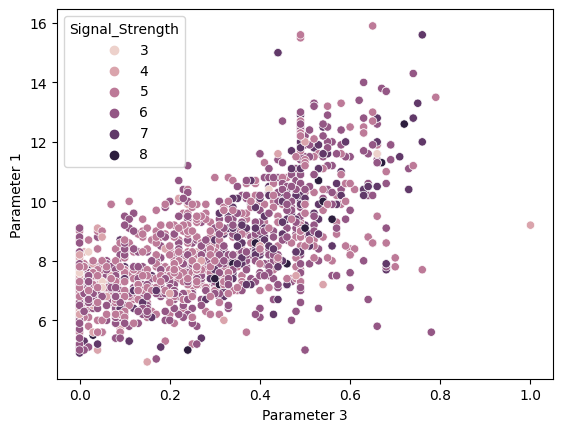

In [17]:
sns.scatterplot(x=df2['Parameter 3'],y=df2['Parameter 1'], hue=df2['Signal_Strength']);

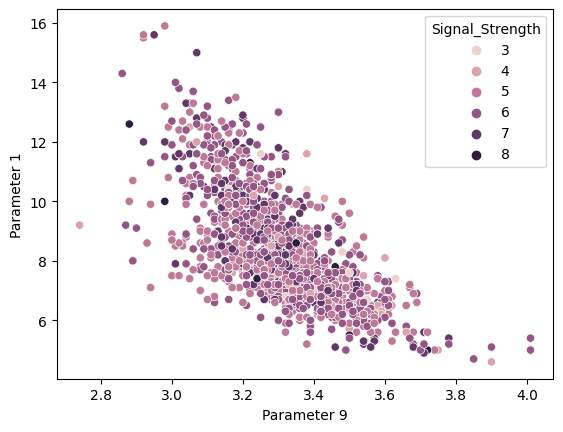

In [18]:
sns.scatterplot(x=df2['Parameter 9'],y=df2['Parameter 1'], hue=df2['Signal_Strength']);

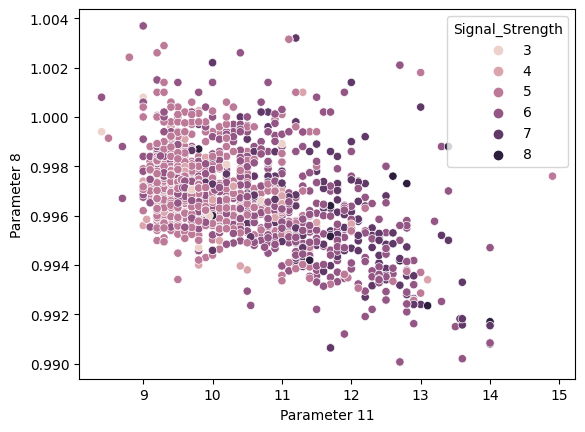

In [19]:
sns.scatterplot(x=df2['Parameter 11'],y=df2['Parameter 8'], hue=df2['Signal_Strength']);

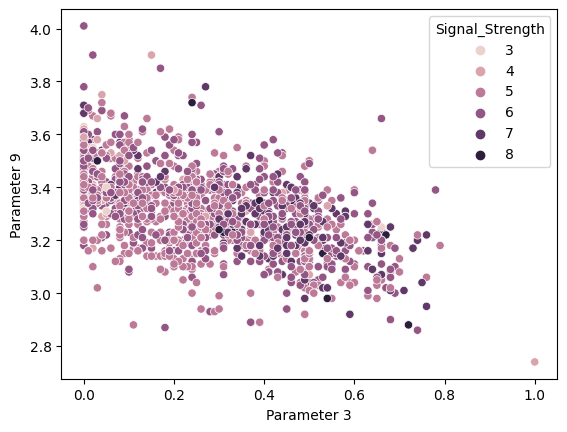

In [20]:
sns.scatterplot(x=df2['Parameter 3'],y=df2['Parameter 9'], hue=df2['Signal_Strength']);

The above scatterplots shows relation between the parameters in given dataset

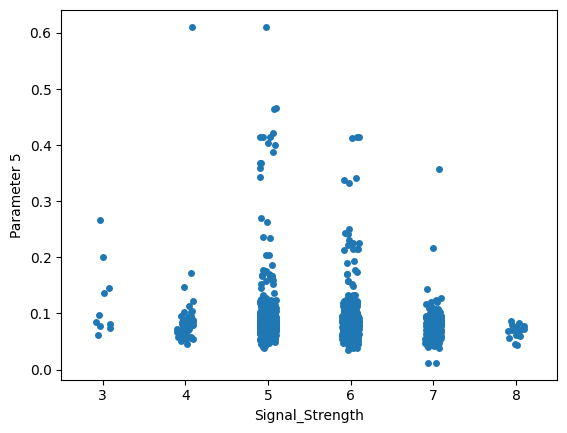

In [21]:
sns.stripplot(data=df2,y='Parameter 5',x='Signal_Strength');

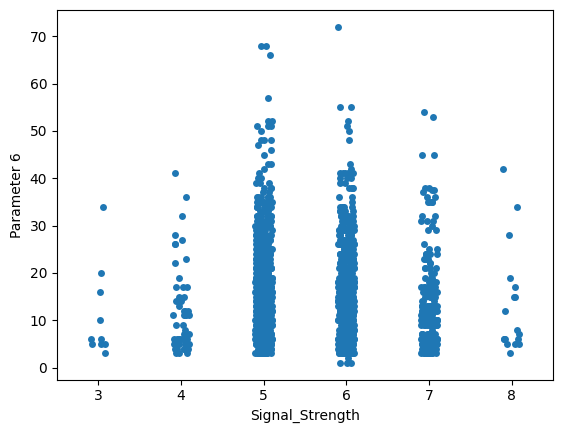

In [22]:
sns.stripplot(data=df2,y='Parameter 6',x='Signal_Strength');

The strip plot shows that different parameters emits varying signals

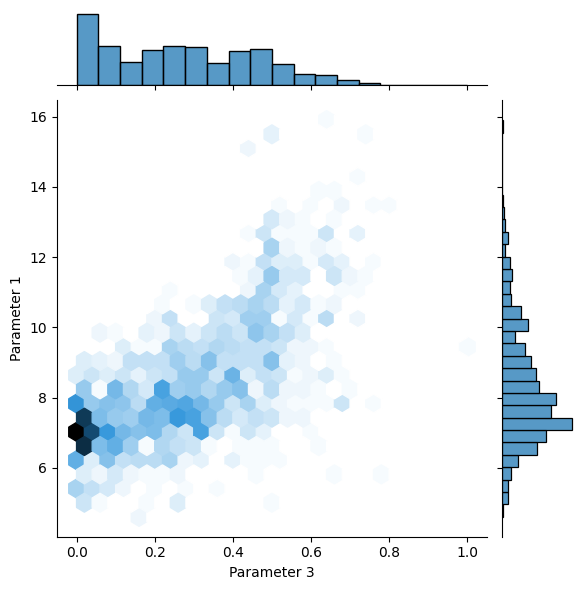

In [23]:
sns.jointplot(data=df2,x='Parameter 3',y='Parameter 1',kind='hex');

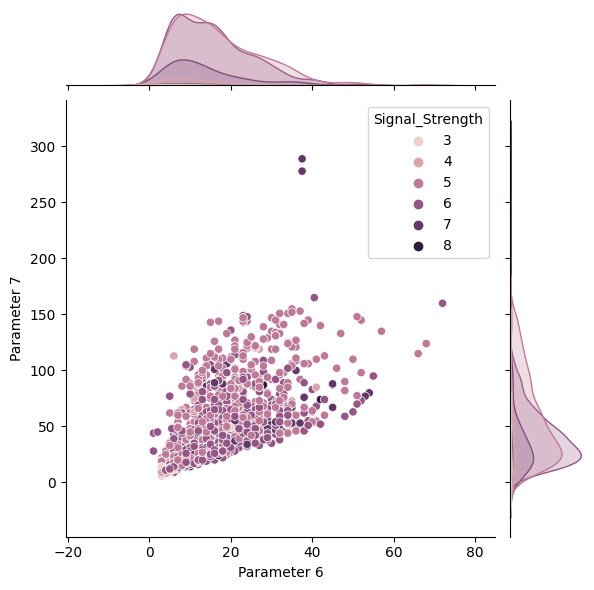

In [24]:
sns.jointplot(data=df2,x='Parameter 6',y='Parameter 7',hue='Signal_Strength');

A few insights from the above plots:
1. The parameters have +ve and -ve correlations with the other parameters as well as target variable
2. A few parameters follow the normal distribution while others do not
3. The Signal strength value of 5 ad 6 are more common than others.

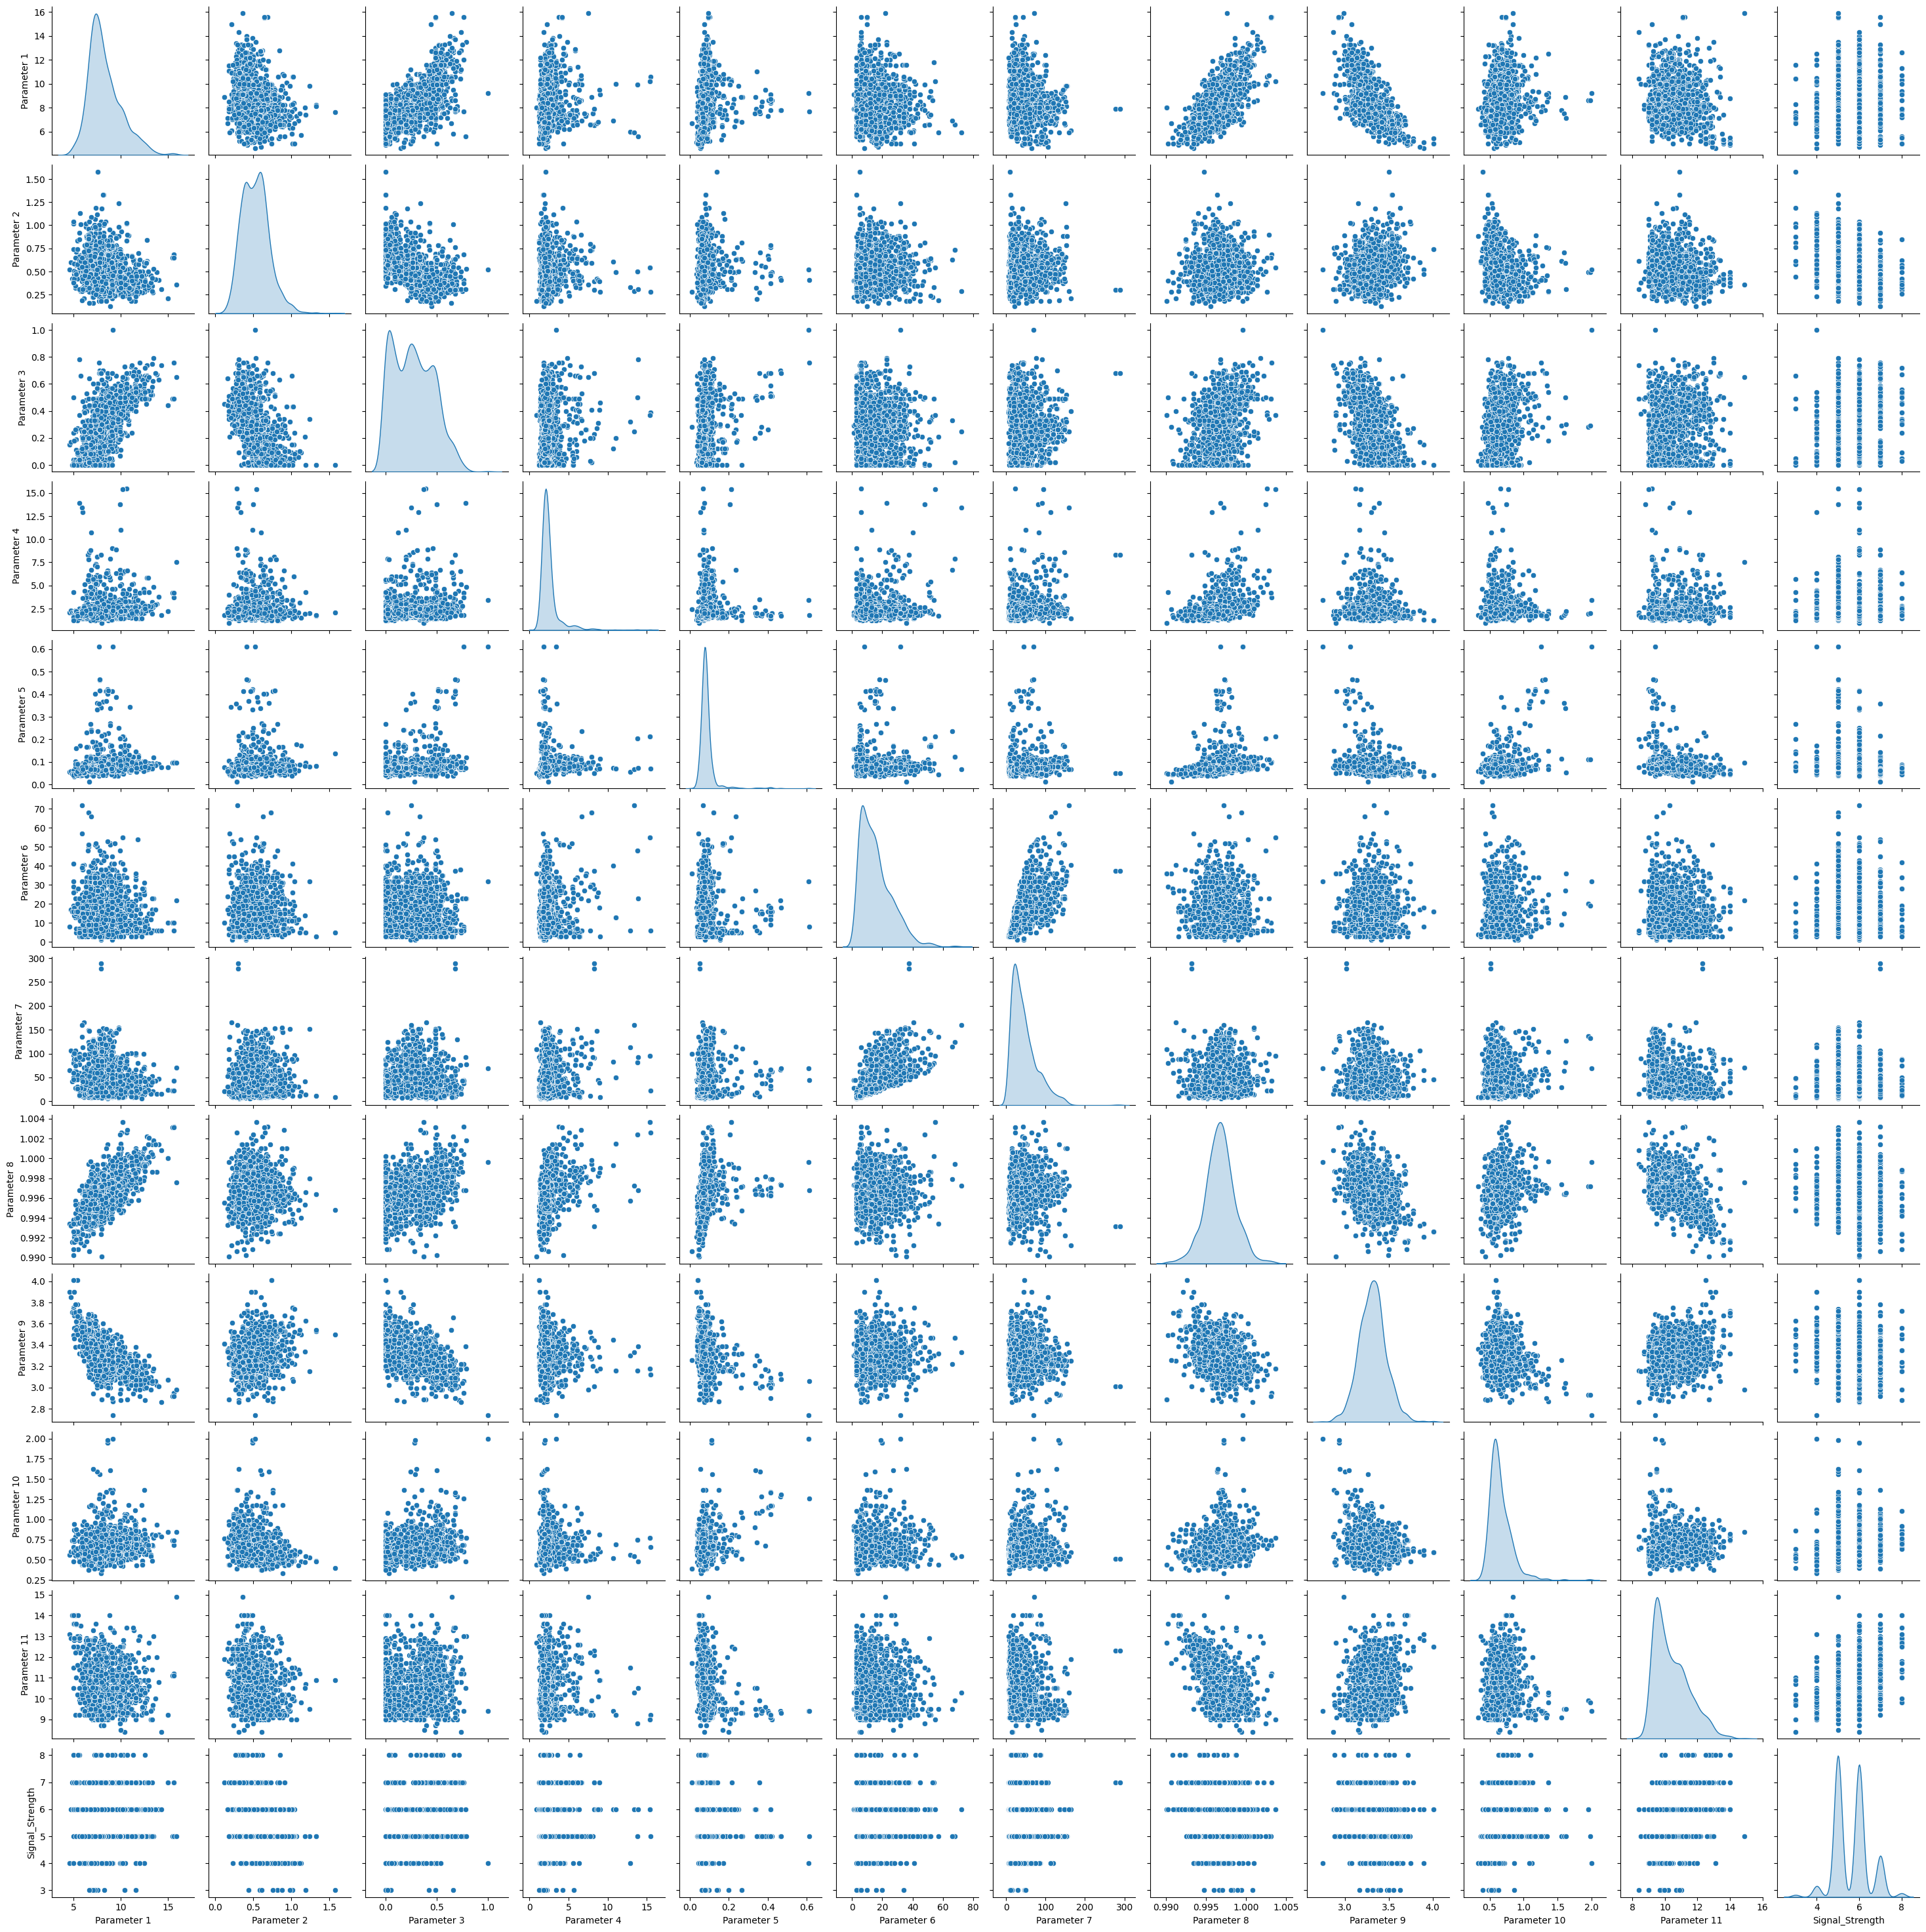

In [25]:
sns.pairplot(data=df2, diag_kind='kde');  #Pair plot

##Classification model

In [26]:
x=df2.drop('Signal_Strength',axis=1)
y=df2['Signal_Strength']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)  #Split the data into train and test data of 70:30 ratio
print('X Train set contains {} data'.format(x_train.shape))
print('X Test set contains {} data'.format(x_test.shape))
print('Y Train set contains {} data'.format(y_train.shape))
print('Y Test set contains {} data'.format(y_test.shape))

X Train set contains (1119, 11) data
X Test set contains (480, 11) data
Y Train set contains (1119,) data
Y Test set contains (480,) data


The train and test data numbers are in sync

In [28]:
x_train=x_train.apply(zscore) #Normalize the data
x_test=x_test.apply(zscore)

In [29]:
num_classes = 10       #convert the target variable to one hot vectors
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat=to_categorical(y_test,num_classes)

In [30]:
print("First 5 training lables as one-hot encoded vectors:\n", y_train_cat[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [31]:
from keras import losses
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU

# create model
model = Sequential()

model.add(Dense(128, activation='relu',kernel_initializer='normal',input_shape=(11,))) ###Multiple Dense layers with Relu activation
model.add(Dense(64, activation='relu',kernel_initializer='normal'))
model.add(Dense(32, activation='relu',kernel_initializer='normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(16, activation='relu',kernel_initializer='normal'))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax activation function is used

In [32]:
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mean_absolute_error', optimizer=adam, metrics=['accuracy']) ### Loss function = MSE

In [33]:
model.summary() #Summary of the neural network model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [34]:
# Fit the model
history=model.fit(x_train, y_train_cat, validation_data=(x_test,y_test_cat), epochs=400, batch_size=200, verbose=2)

Epoch 1/400
6/6 - 4s - loss: 0.1798 - accuracy: 0.3816 - val_loss: 0.1796 - val_accuracy: 0.4042 - 4s/epoch - 623ms/step
Epoch 2/400
6/6 - 0s - loss: 0.1794 - accuracy: 0.3959 - val_loss: 0.1789 - val_accuracy: 0.4062 - 50ms/epoch - 8ms/step
Epoch 3/400
6/6 - 0s - loss: 0.1785 - accuracy: 0.3959 - val_loss: 0.1777 - val_accuracy: 0.4062 - 59ms/epoch - 10ms/step
Epoch 4/400
6/6 - 0s - loss: 0.1770 - accuracy: 0.3959 - val_loss: 0.1752 - val_accuracy: 0.4062 - 49ms/epoch - 8ms/step
Epoch 5/400
6/6 - 0s - loss: 0.1734 - accuracy: 0.3959 - val_loss: 0.1693 - val_accuracy: 0.4062 - 60ms/epoch - 10ms/step
Epoch 6/400
6/6 - 0s - loss: 0.1652 - accuracy: 0.3959 - val_loss: 0.1560 - val_accuracy: 0.4062 - 59ms/epoch - 10ms/step
Epoch 7/400
6/6 - 0s - loss: 0.1489 - accuracy: 0.3959 - val_loss: 0.1353 - val_accuracy: 0.4062 - 64ms/epoch - 11ms/step
Epoch 8/400
6/6 - 0s - loss: 0.1298 - accuracy: 0.3959 - val_loss: 0.1217 - val_accuracy: 0.4062 - 58ms/epoch - 10ms/step
Epoch 9/400
6/6 - 0s - loss

In [35]:
# predicting the model on test data
y_pred=model.predict(x_test)

15/15 [==============================] - 0s 2ms/step


In [36]:
y_pred[0]

array([7.5059706e-20, 4.5178044e-15, 1.4451022e-21, 1.1218585e-22,
       1.0324295e-13, 2.0835235e-11, 1.0000000e+00, 7.0103475e-16,
       8.8083591e-15, 2.2171640e-18], dtype=float32)

In [37]:
# Since the outputs are in probabilities we try to get the label
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.68      0.73      0.71       207
           6       0.54      0.72      0.62       195
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         3

    accuracy                           0.61       480
   macro avg       0.20      0.24      0.22       480
weighted avg       0.52      0.61      0.56       480



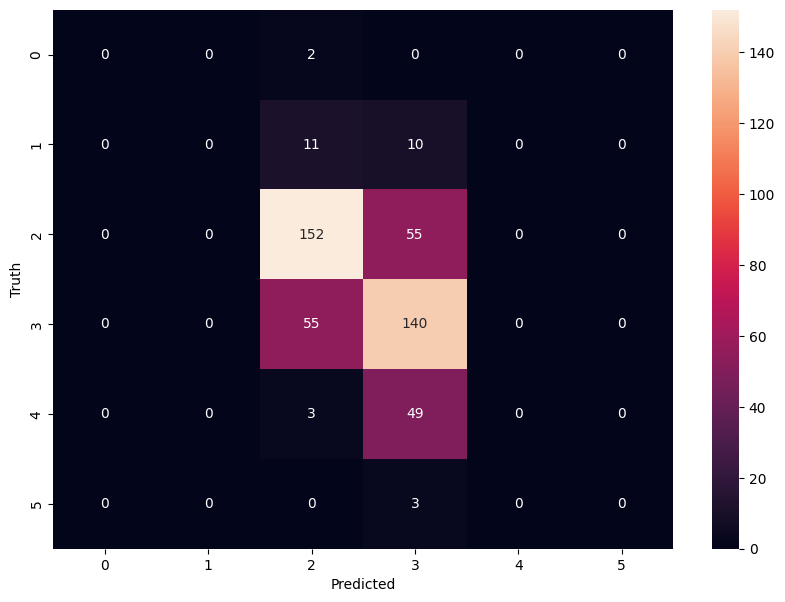

In [39]:
from sklearn.metrics import confusion_matrix             #Confusion matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

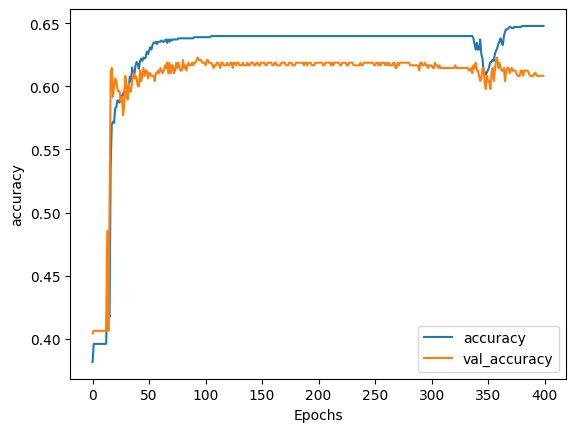

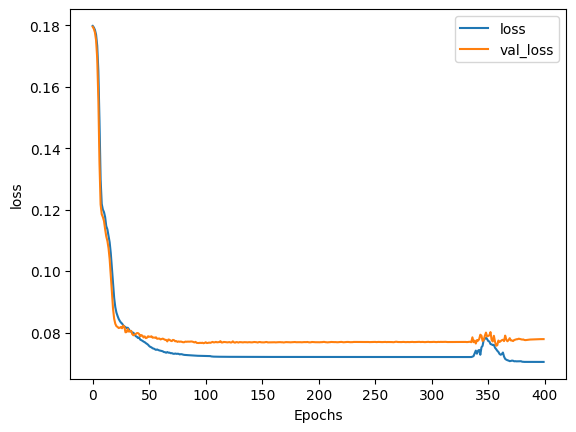

In [40]:
import matplotlib.pyplot as plt           #plotting the accuracy and losses after each iteration


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

##Implementing dropout in the model

In [41]:
from keras import losses
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,Dropout,BatchNormalization

# create model
model = Sequential()

model.add(Dense(128, activation='relu',kernel_initializer='normal',input_shape=(11,))) ###Multiple Dense layers with Relu activation
model.add(Dense(64, activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu',kernel_initializer='normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu',kernel_initializer='normal'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax activation function is used

In [42]:
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mean_absolute_error', optimizer=adam, metrics=['accuracy']) ### Loss function = MSE

In [43]:
model.summary() #Summary of the neural network model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)               

In [44]:
# Fit the model
history=model.fit(x_train, y_train_cat, validation_data=(x_test,y_test_cat), epochs=400, batch_size=200, verbose=2)

Epoch 1/400
6/6 - 1s - loss: 0.1800 - accuracy: 0.1984 - val_loss: 0.1798 - val_accuracy: 0.4062 - 754ms/epoch - 126ms/step
Epoch 2/400
6/6 - 0s - loss: 0.1797 - accuracy: 0.3503 - val_loss: 0.1796 - val_accuracy: 0.4062 - 45ms/epoch - 8ms/step
Epoch 3/400
6/6 - 0s - loss: 0.1795 - accuracy: 0.3244 - val_loss: 0.1793 - val_accuracy: 0.4062 - 45ms/epoch - 8ms/step
Epoch 4/400
6/6 - 0s - loss: 0.1792 - accuracy: 0.3467 - val_loss: 0.1790 - val_accuracy: 0.4062 - 44ms/epoch - 7ms/step
Epoch 5/400
6/6 - 0s - loss: 0.1788 - accuracy: 0.3315 - val_loss: 0.1784 - val_accuracy: 0.4062 - 43ms/epoch - 7ms/step
Epoch 6/400
6/6 - 0s - loss: 0.1781 - accuracy: 0.3441 - val_loss: 0.1774 - val_accuracy: 0.4062 - 44ms/epoch - 7ms/step
Epoch 7/400
6/6 - 0s - loss: 0.1766 - accuracy: 0.3378 - val_loss: 0.1750 - val_accuracy: 0.4062 - 44ms/epoch - 7ms/step
Epoch 8/400
6/6 - 0s - loss: 0.1737 - accuracy: 0.3146 - val_loss: 0.1695 - val_accuracy: 0.4062 - 44ms/epoch - 7ms/step
Epoch 9/400
6/6 - 0s - loss: 

In [45]:
# predicting the model on test data
y_pred=model.predict(x_test)

15/15 [==============================] - 0s 2ms/step


In [46]:
y_pred[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.7189235e-23, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [47]:
# Since the outputs are in probabilities we try to get the label
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.71      0.73      0.72       207
           6       0.55      0.74      0.63       195
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         3

    accuracy                           0.62       480
   macro avg       0.21      0.25      0.22       480
weighted avg       0.53      0.62      0.56       480



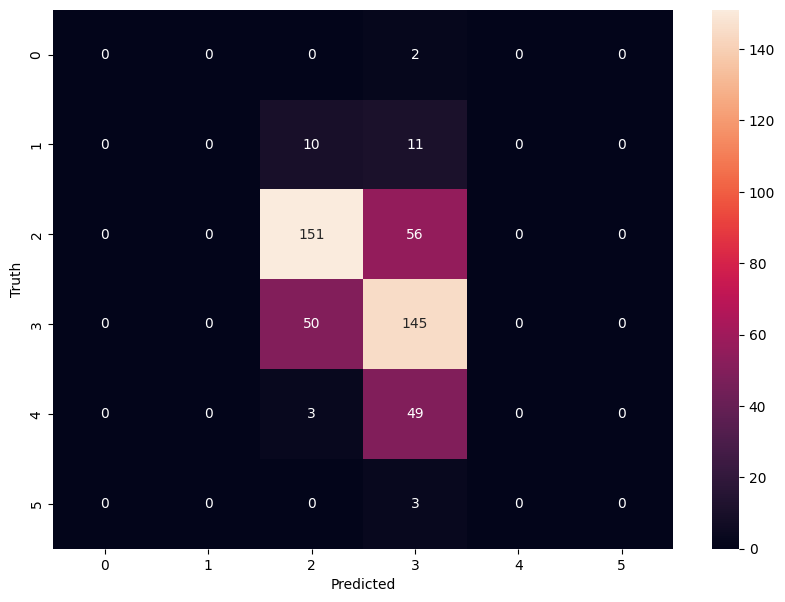

In [49]:
from sklearn.metrics import confusion_matrix             #Confusion matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

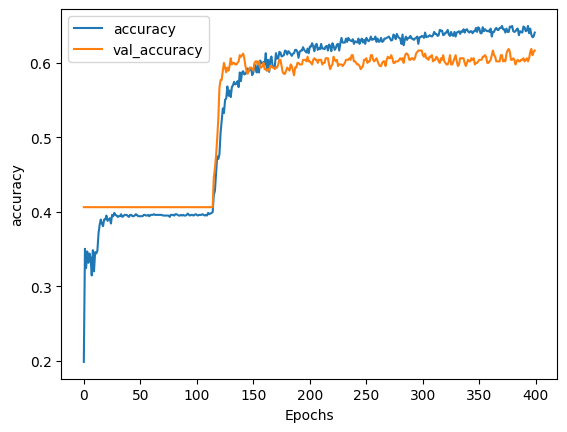

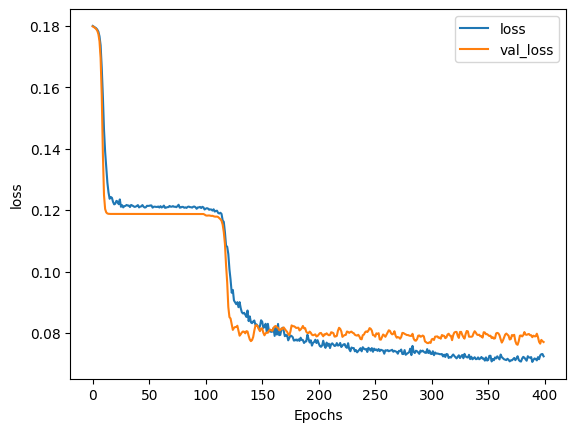

In [50]:
import matplotlib.pyplot as plt           #plotting the accuracy and losses after each iteration


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Insights on difference between the two models:
1. On implementing dropout we can see that the validation accuracy has improved. Also the validation losses has reduced.
2. On using dropout each neuron get trained properly and they perform well with the test data.

##Part B

##Loading the dataset

In [51]:
import h5py

In [52]:
h5f = h5py.File('/content/MyDrive/MyDrive/Dataset/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')    #reading the h5py file

In [53]:
x_train = h5f['X_train'][:]       #loading the train and test data
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [54]:
h5f.close()      #closing the file

##Data Preprocessing and Visualizing

In [55]:
print('X Train set contains {} data'.format(x_train.shape))
print('X Test set contains {} data'.format(x_test.shape))          #shapeof the train and test data
print('Y Train set contains {} data'.format(y_train.shape))
print('Y Test set contains {} data'.format(y_test.shape))

X Train set contains (42000, 32, 32) data
X Test set contains (18000, 32, 32) data
Y Train set contains (42000,) data
Y Test set contains (18000,) data


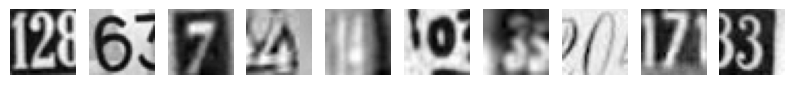

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [56]:
plt.figure(figsize=(10, 1))    #first 10 images from the dataset
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [57]:
image_size = 32*32
x_train = x_train.reshape(x_train.shape[0], image_size)    #Reshaping the images
x_test = x_test.reshape(x_test.shape[0], image_size)

# normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

print('Training set', x_train.shape, y_train.shape)
print('Test set', x_test.shape, y_test.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


In [58]:
np.unique(y_train)  #target variable labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [59]:
num_classes = 10       #convert the target variable to one hot vectors
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat=to_categorical(y_test,num_classes)

In [60]:
print("First 5 training lables as one-hot encoded vectors:\n", y_train_cat[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Label:  6
label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


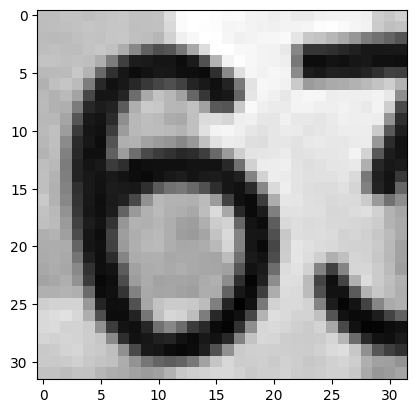

In [61]:
print("Label: ", y_train[1])                             #example
print("label:", y_train_cat[1])
plt.imshow(x_train[1].reshape(32,32), cmap='gray')

##Model training and Evaluation

In [62]:
model = Sequential()

model.add(Dense(512, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense layers with Relu activation
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))

#model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
#model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used

In [63]:
# Compile model
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [64]:
model.summary() #Summary of neural network model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 128)               65664     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 591,754
Trainable params: 591,754
Non-trainable params: 0
_________________________________________________________________


In [65]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau            #callback
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [66]:
# Fit the model
history=model.fit(x_train, y_train_cat, validation_split=0.2, epochs=30, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/30

Epoch 1: saving model to model_weights.h5
263/263 - 1s - loss: 2.3056 - accuracy: 0.1285 - val_loss: 2.2171 - val_accuracy: 0.1961 - lr: 0.0010 - 1s/epoch - 5ms/step
Epoch 2/30

Epoch 2: saving model to model_weights.h5
263/263 - 1s - loss: 1.8350 - accuracy: 0.3657 - val_loss: 1.5143 - val_accuracy: 0.5121 - lr: 0.0010 - 799ms/epoch - 3ms/step
Epoch 3/30

Epoch 3: saving model to model_weights.h5
263/263 - 1s - loss: 1.3865 - accuracy: 0.5565 - val_loss: 1.3361 - val_accuracy: 0.5874 - lr: 0.0010 - 800ms/epoch - 3ms/step
Epoch 4/30

Epoch 4: saving model to model_weights.h5
263/263 - 1s - loss: 1.2226 - accuracy: 0.6194 - val_loss: 1.1900 - val_accuracy: 0.6194 - lr: 0.0010 - 798ms/epoch - 3ms/step
Epoch 5/30

Epoch 5: saving model to model_weights.h5
263/263 - 1s - loss: 1.1209 - accuracy: 0.6510 - val_loss: 1.0789 - val_accuracy: 0.6651 - lr: 0.0010 - 792ms/epoch - 3ms/step
Epoch 6/30

Epoch 6: saving model to model_weights.h5
263/263 - 1s - loss: 1.0561 - accuracy: 0.67

In [67]:
# predicting the model on test data
y_pred=model.predict(x_test)

563/563 [==============================] - 1s 1ms/step


In [68]:
# Since the outputs are probability values we try to get the labels
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1814
           1       0.79      0.82      0.81      1828
           2       0.83      0.79      0.81      1803
           3       0.74      0.73      0.73      1719
           4       0.84      0.82      0.83      1812
           5       0.69      0.79      0.74      1768
           6       0.79      0.77      0.78      1832
           7       0.81      0.83      0.82      1808
           8       0.78      0.71      0.74      1812
           9       0.75      0.77      0.76      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.79      0.78      0.78     18000



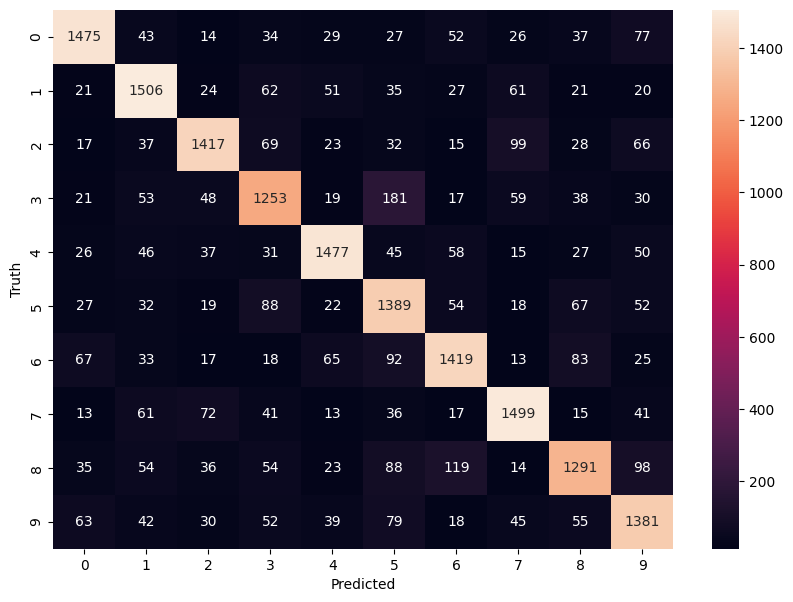

In [70]:
from sklearn.metrics import confusion_matrix            #confusion matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

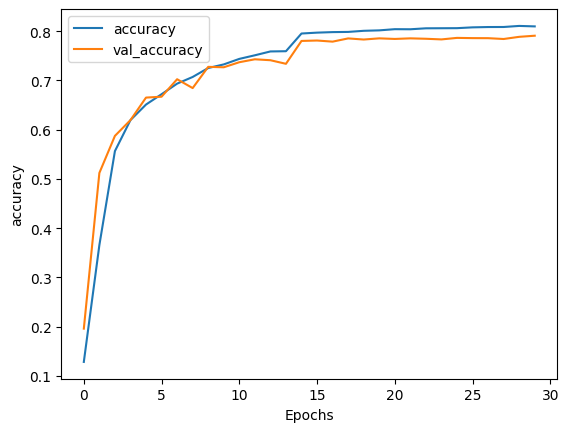

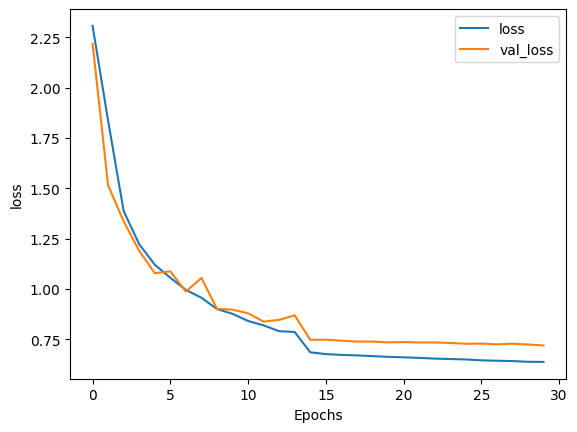

In [71]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])          #plotting the accuracy and losses after each iteration
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

We can see that the model is not overfit. The training and validation accuracy and losses are close to each other.